# MODELE KNN

# Enoncé

**Partie 1 : Base de données, Analyse, Prétraitement et Préparation**

Un dossier nommé « Run_Questionnaire » vous sera transmis, vous êtes censés à comprendre et maitriser le contenu et le fonctionnement de ce dossier (Votre fiche de lecture doit être notée dans le compte rendu final).


Exécutez le Notebook « Run.ipynb » pour collecter votre DataSet.

Instruction

Chacun exécutera 10 fois le Notebook (ne pas trop concentrer sur les questions, et changer vos réponses à chaque fois). Faites attention, il y a des réponses par a, b ou c et d’autre par 1, 2 ou 3.
Pour traiter tous les cas possibles, vous êtes obligés de mettre des réponses erronées (hors proposition, exemple de réponse : w ou h ou 9 ou pas de réponse carrément).
Codez un script python qui permet de regrouper les DataSets de chacun en une seule DataSet.

Appliquez les traitements nécessaires pour préparer la DataSet en utilisant Numpy et Pandas, (vous pouvez trouver un référentiel sur ressource) (présenter votre pipeline dans le compte rendu). NB. Le résultat de classification dépond essentiellement de la qualité du prétraitement.

**Partie 2 : Développement et entraînement d’un modèle KNN**

La technique de classification KNN est considérée comme la technique la plus simple pour appliquer la classification supervisée, tout simplement, une nouvelle donnée de test sera classée comme la majorité de ses voisins (la distance la plus proche). À la suite de votre recherche sur le principe de KNN, nous développons notre modèle KNN. Pour cela :

**KNN From Scratch**

B)Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

A)Codez l’algorithme de KNN sous forme une fonction (def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs)) qui :

C) Calcul la distance entre Data de test et Data d’apprentissage.
Trouve la/les distances plus proche de « k » voisins.
Classe Data de test selon la classe majoritaire de « k » voisins.
Retourne la classe de Data Test.
Réalisez des expérimentations en variant la distance et le nombre de « k ».
Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

**KNN Sklearn**

La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles.
Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).

**Partie 3 : Mettre en place la solution dans l’application de test de personnalité**

Utilisez la fonction « joblib » pour enregistrer votre modèle, une fois vous avez préparé votre meilleur modèle de classification Faites intégrer cette solution à l’Application

Test de Personnalité et adapter l’application pour comparer le résultat avec et sans IA.

# Partie 1 : Base de données, Analyse, Prétraitement et Préparation

## Créer l'environnement

>***Import des bibliothèques***

In [9]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>***Import du jeu de données***

In [10]:
# Chemin d'accès au data
path =r'C:\Users\vcice\OneDrive\IA Modelisation Microsoft Simplon Isen\KNN\Run_Questionnaire\Dataset'
filenames = glob.glob(path + "/DataSet*.csv")

# Création d'une boucle pour compiler les différents fichiers CSV qui sont dans le dossier Dataset
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Création d'un seul dataframe en fusionnant les différents fichiers CSV
df_brut = pd.concat(dfs, ignore_index=True)
df_brut

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
170,a,c,b,c,b,3,1,2.0,3,2,10,B
171,x,r,y,b,z,p,m,NaN,w,p,0,C
172,q,x,5,0,98,345,azerty,bvc,1,qaz,1,C
173,dfg,a,qsd,NaN,onv,polk,mlp,"&é""'",NaN,dx,1,C


>***Vérification du pourcentage des valeurs nulles***

In [11]:
# Vérification du % de données manquantes
for col in df_brut.columns:
    pct_missing = np.mean(df_brut[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Q1 - 4%
Q2 - 6%
Q3 - 6%
Q4 - 5%
Q5 - 7%
Q6 - 5%
Q7 - 3%
Q8 - 5%
Q9 - 4%
Q10 - 3%
Score - 0%
Interpretation - 0%


## Retraitement des données pour les normaliser

### Lissage/normalisation des réponses sous forme de lettre (sauf données cible)

>***Selection des colonnes avec des réponses lettre***

In [12]:
df_lettres=df_brut.iloc[:,:5]
df_lettres

,Q1,Q2,Q3,Q4,Q5
0,a,a,a,a,a
1,b,b,b,b,b
2,c,c,c,c,c
3,a,b,c,a,b
4,b,c,a,c,a
...,...,...,...,...,...
170,a,c,b,c,b
171,x,r,y,b,z
172,q,x,5,0,98
173,dfg,a,qsd,NaN,onv


>***Lissage des lettres: transformation des majuscules en minuscules***

In [13]:
df_lettres=df_brut.iloc[:,:5].replace({'A':'a', 'B': 'b', 'C': 'c'})
df_lettres

,Q1,Q2,Q3,Q4,Q5
0,a,a,a,a,a
1,b,b,b,b,b
2,c,c,c,c,c
3,a,b,c,a,b
4,b,c,a,c,a
...,...,...,...,...,...
170,a,c,b,c,b
171,x,r,y,b,z
172,q,x,5,0,98
173,dfg,a,qsd,NaN,onv


>***Nettoyage de toutes les réponses qui ne sont ni a, b ou c***

In [14]:
df_lettres=df_lettres[df_lettres.isin(["a","b","c"])]
#df_lettres= df_lettres.fillna(np.NaN) #pas necessaire car on a crée une nouvelle instance
df_lettres

,Q1,Q2,Q3,Q4,Q5
0,a,a,a,a,a
1,b,b,b,b,b
2,c,c,c,c,c
3,a,b,c,a,b
4,b,c,a,c,a
...,...,...,...,...,...
170,a,c,b,c,b
171,NaN,NaN,NaN,b,NaN
172,NaN,NaN,NaN,NaN,NaN
173,NaN,a,NaN,NaN,NaN


### Lissage/normalisation des données en format chiffre

>***Selection des colonnes des réponses en chiffre***

In [15]:
df_chiffres=df_brut.iloc[:,5:10]
df_chiffres

,Q6,Q7,Q8,Q9,Q10
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3
3,1,2,3,1,2
4,3,2,3,1,2
...,...,...,...,...,...
170,3,1,2.0,3,2
171,p,m,NaN,w,p
172,345,azerty,bvc,1,qaz
173,polk,mlp,"&é""'",NaN,dx


>***Lissage des chiffres: transformation des charactères en format numérique***

In [16]:
df_chiffres=df_chiffres.replace({'3':3.0, '2': 2.0, '1': 1.0})
df_chiffres=df_chiffres.replace({'3.0':3.0, '2.0': 2.0, '1.0': 1.0})
df_chiffres

,Q6,Q7,Q8,Q9,Q10
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3
3,1,2,3,1,2
4,3,2,3,1,2
...,...,...,...,...,...
170,3.0,1.0,2.0,3.0,2.0
171,p,m,NaN,w,p
172,345,azerty,bvc,1.0,qaz
173,polk,mlp,"&é""'",NaN,dx


>***Nettoyage de toutes les réponses qui ne sont ni 1, 2 ou 3***

In [17]:
df_chiffres=df_chiffres[df_chiffres.isin(['1','1.0',1.,'2','2.0',2.,'3','3.0',3.])]
df_chiffres

,Q6,Q7,Q8,Q9,Q10
0,1,1,1,1,1
1,2,2,2,2,2
2,3,3,3,3,3
3,1,2,3,1,2
4,3,2,3,1,2
...,...,...,...,...,...
170,3.0,1.0,2.0,3.0,2.0
171,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,1.0,NaN
173,NaN,NaN,NaN,NaN,NaN


### Regroupement des deux jeux lissés de données

In [18]:
#on regroupe tout tout pour obtenir un dataset pret pour la prochaine étape
df_reuni = pd.concat([df_lettres, df_chiffres, df_brut['Interpretation']], axis=1)
df_reuni

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,a,a,a,a,a,1,1,1,1,1,B
1,b,b,b,b,b,2,2,2,2,2,C
2,c,c,c,c,c,3,3,3,3,3,A
3,a,b,c,a,b,1,2,3,1,2,C
4,b,c,a,c,a,3,2,3,1,2,B
...,...,...,...,...,...,...,...,...,...,...,...
170,a,c,b,c,b,3.0,1.0,2.0,3.0,2.0,B
171,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,NaN,C
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,C
173,NaN,a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [19]:
df_reuni.isnull().sum()

Q1                29
Q2                24
Q3                28
Q4                27
Q5                32
Q6                41
Q7                33
Q8                29
Q9                24
Q10               19
Interpretation     0
dtype: int64

### Nettoyages des valeurs vides NaN

In [20]:
# Elimination des valeurs NaN dans le jeu de données
df = df_reuni.dropna()
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,a,a,a,a,a,1,1,1,1,1,B
1,b,b,b,b,b,2,2,2,2,2,C
2,c,c,c,c,c,3,3,3,3,3,A
3,a,b,c,a,b,1,2,3,1,2,C
4,b,c,a,c,a,3,2,3,1,2,B
...,...,...,...,...,...,...,...,...,...,...,...
161,c,c,c,c,c,3.0,3.0,3.0,3.0,3.0,A
167,a,c,c,b,b,3.0,1.0,3.0,2.0,3.0,B
168,c,a,c,b,a,3.0,1.0,2.0,3.0,3.0,B
169,a,c,b,c,a,3.0,1.0,2.0,3.0,1.0,B


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 170
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              91 non-null     object
 1   Q2              91 non-null     object
 2   Q3              91 non-null     object
 3   Q4              91 non-null     object
 4   Q5              91 non-null     object
 5   Q6              91 non-null     object
 6   Q7              91 non-null     object
 7   Q8              91 non-null     object
 8   Q9              91 non-null     object
 9   Q10             91 non-null     object
 10  Interpretation  91 non-null     object
dtypes: object(11)
memory usage: 8.5+ KB


## Attribution d'une valeur aux réponses selon règles de l'énoncé

In [22]:
#Attention à l'ordre des remplacements pour ne pas remplacer 2 par 0 apres avoir remplacé c par 2
df=df.replace({1:1, 2:0, 3:2})
df=df.replace({'a':1, 'b':0, 'c':2})
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
0,1,1,1,1,1,1,1,1,1,1,B
1,0,0,0,0,0,0,0,0,0,0,C
2,2,2,2,2,2,2,2,2,2,2,A
3,1,0,2,1,0,1,0,2,1,0,C
4,0,2,1,2,1,2,0,2,1,0,B
...,...,...,...,...,...,...,...,...,...,...,...
161,2,2,2,2,2,2,2,2,2,2,A
167,1,2,2,0,0,2,1,2,0,2,B
168,2,1,2,0,1,2,1,0,2,2,B
169,1,2,0,2,1,2,1,0,2,1,B


# PARTIE 2: développement et entrainement d'un modele KNN

## Répartition entre les valeurs explicatives(features) et les valeurs cibles(target)

(La colonne score total a été exclue lors de la concatenation car elle correspond à un calcul de synthèse donc inexploitable)

In [23]:
# Valeur explicative (features)
x = df.iloc[:, :10].values
# Valeur cible (label)
y = df.iloc[:,10:11].values

## Répartition entre les valeurs d'apprentissages et les valeurs test (20%)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## KNN from scratch

**KNN Sklearn**

La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles.
Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).


In [93]:
#Calcul des distances
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    for key,value in kargs.items():
        if key == 'p' :
            p = value
        else :
            p = 3
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**3)**(1/3)
    return Dis


#**kargs: permet soit de rentrer une valeur par défaut pour p soit faire caclculer p
#Dans la formule mathématique p correspond à la racine:
#Si distance euclidienne: p = 2
#Si distance mahattan: p=1
#Si distance minkowski: p>=3
#Distance euclidienne = np.sqrt(np.sum((D_T-D_A)**2))

# Choix des paramètres du modèle k=3 et de la distance manhattan
k = 3
metric = 'manhattan'

#Initialisation du modele
def knn(X_test, X_train, y_train, k, metric) :

#Création des sous-ensembles respectifs des x_test (D_T) composé de j lignes (=len(x_test)), et des x-train (D_A) avec i lignes(=len(x_train))
#Pour une ligne donnée de D_T, on calcule la distance de X_test à x_train, puis on renouvelle l'opération pour chaque ligne d D_T    
    Resultat = []

    for j in range(0,len(x_test)):
        D_T = x_test[j,:]
        Distance = []
        for i in range(0,len(x_train)):
            D_A = x_train[i,:]
        
            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

# Tri des distances par ordre croissant
        SS = np.sort(Distance)  
#Tri des indexes correspondant aux distances par ordre croissant
        S = np.argsort(Distance)
#Prediction sur k indexes choisis, et on va chercher les index correspondant dans les y_train 
        index_petite_distance = S[:k]
        Pred = y_train[index_petite_distance]

#Vote majoritaire pour compter les k de A, B  et C 
        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

#Tri des max des indexes
        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'
        
        Resultat.append(P)
        
knn(x_test, x_train, y_train, k, 'minkowski')

## KNN avec Sklearn

Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

>***Modèle KNeighborsClassifier sur les données avec le Kfold***

In [81]:
#Importation des bibliothèques et fonctions
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN

#Choix du Kfold
kf = KFold(n_splits=5)

#Initialisation
model = KNN(n_neighbors=8)

#Entrainement
performance = []
for train, test in kf.split(x):
    x_train = x[train,:]
    y_train = y[train,:]
    
    x_test = x[test,:]
    y_test =y[test,:] 
    
    model.fit(x_train,y_train)
    
#Prediction
    Prediction = model.predict(x_test)
    
#Performance    
    performance.append(accuracy_score(y_test, Prediction))
    p=accuracy_score(y_test, Prediction)
    print("performance:", p )

performance: 0.7368421052631579
performance: 0.5
performance: 0.5555555555555556
performance: 0.3888888888888889
performance: 0.8333333333333334


C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

>***Analyse des paramètres de performance***

In [88]:
#Import, entrainement et prédiction
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

#Import des bibliothèques & fonctions
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Affichage des resultats 
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(result)

result1 = classification_report(y_test, y_pred)
result2 = accuracy_score(y_test,y_pred)
print("Classification Report:",)
print (result1)
print("Accuracy:",result2)

Confusion Matrix
[[ 0  2  0]
 [ 0 10  0]
 [ 0  1  5]]
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.77      1.00      0.87        10
           C       1.00      0.83      0.91         6

    accuracy                           0.83        18
   macro avg       0.59      0.61      0.59        18
weighted avg       0.76      0.83      0.79        18

Accuracy: 0.8333333333333334


C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarnin

C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\vcice\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

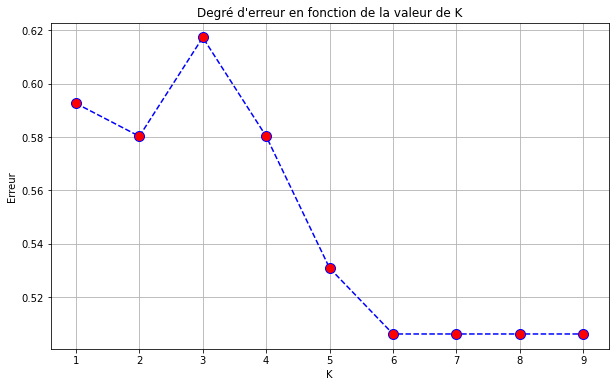

In [103]:
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != np.array(y_test)))

#On affiche le résultat sous la forme d'un graphique

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("Degré d'erreur en fonction de la valeur de K")
plt.xlabel('K')
plt.ylabel('Erreur')
plt.grid()

# PARTIE 3 : Mettre en place la solution dans l'application test de personnalité

In [104]:
import joblib
filename = 'knnfinal'
joblib.dump(classifier, filename)

['knnfinal']